In [375]:
#**Step 1: Import Libraries**
#This step sets up the required libraries for data manipulation, visualization, and machine learning.

In [377]:
# Import essential libraries
import pandas as pd  # For data manipulation and analysis with DataFrames
import numpy as np  # For numerical operations, including arrays and matrices
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization, especially with heatmaps
import tensorflow as tf  # For building and training machine learning and deep learning models
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For normalizing features
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score  # For model evaluation


In [379]:
#**Step 2: Load the Dataset**

In [381]:
# Load the dataset
original_data = pd.read_csv('2.Imperial-Predicting Cardiovascular Disease Risk/heart_disease_uci.csv')

# Display the first few rows
original_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [383]:
#**Step 3: Visualize Missing Data**

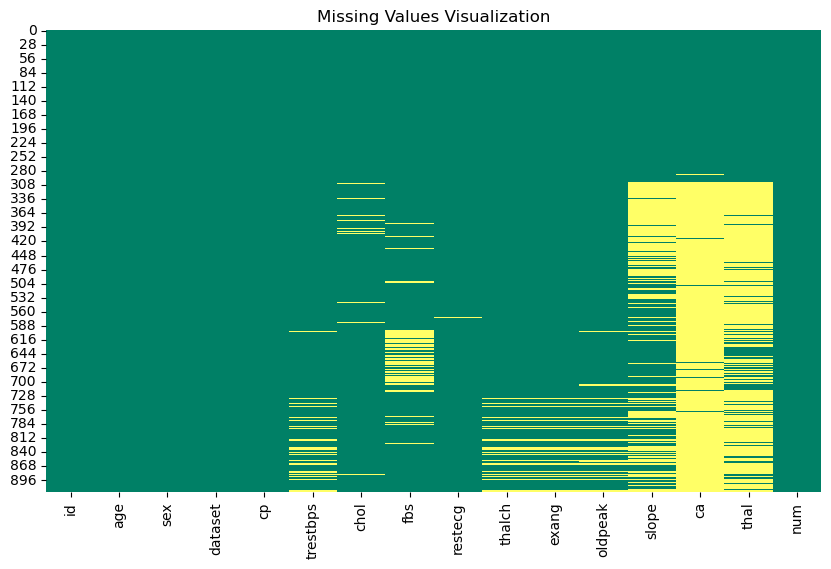

In [385]:
plt.figure(figsize=(10, 6))
sns.heatmap(original_data.isnull(), cbar=False, cmap='summer')
plt.title("Missing Values Visualization")
plt.show()

In [386]:
print(data.columns)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'sex_Male',
       'thal_normal', 'thal_reversable defect', 'slope_flat',
       'slope_upsloping', 'exang_True'],
      dtype='object')


In [389]:
#**Step 4: Data Processing (Feature Selection and One-Hot Encoding)**

In [391]:
# Select relevant features
features = ['age', 'sex', 'trestbps', 'chol', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
data = original_data[features]

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['sex', 'thal', 'slope', 'exang'], drop_first=True)

# Display processed data
data.head()


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,thal_normal,thal_reversable defect,slope_flat,slope_upsloping,exang_True
0,63,145.0,233.0,150.0,2.3,0.0,True,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,3.0,True,True,False,True,False,True
2,67,120.0,229.0,129.0,2.6,2.0,True,False,True,True,False,True
3,37,130.0,250.0,187.0,3.5,0.0,True,True,False,False,False,False
4,41,130.0,204.0,172.0,1.4,0.0,False,True,False,False,True,False


In [393]:
#**Step 5: Normalize Continuous Features**
#Normalize continuous features to ensure they are on a similar scale 
#which helps with model convergence during training.

In [395]:
from sklearn.preprocessing import StandardScaler

# Select continuous features for normalization
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()

# Apply standardization to the continuous features
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Display the DataFrame after normalization
data.head(5)


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,thal_normal,thal_reversable defect,slope_flat,slope_upsloping,exang_True
0,1.007386,0.675287,0.305908,0.480653,1.303159,0.0,True,False,False,False,False,False
1,1.432034,1.462483,0.784599,-1.140262,0.569611,3.0,True,True,False,True,False,True
2,1.432034,-0.636705,0.269780,-0.329805,1.578239,2.0,True,False,True,True,False,True
3,-1.752828,-0.111908,0.459450,1.908602,2.403480,0.0,True,True,False,False,False,False
4,-1.328180,-0.111908,0.043982,1.329704,0.477918,0.0,False,True,False,False,True,False


In [397]:
#**Step 6: Handle Missing Values**

In [399]:
# Drop rows with missing values
data = data.dropna()

# Confirm that no missing values remain
print(data.isnull().sum())

age                       0
trestbps                  0
chol                      0
thalch                    0
oldpeak                   0
ca                        0
sex_Male                  0
thal_normal               0
thal_reversable defect    0
slope_flat                0
slope_upsloping           0
exang_True                0
dtype: int64


In [401]:
#Step 7: Normalize Continuous Features
#Normalize continuous features to make sure they are on a similar scale, which helps with model convergence

In [403]:
# Select continuous features for normalization
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()

# Apply standardization
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Display normalized data
data.head()


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,thal_normal,thal_reversable defect,slope_flat,slope_upsloping,exang_True
0,0.932921,0.754438,-0.136594,0.051960,1.086111,0.0,True,False,False,False,False,False
1,1.378928,1.604146,0.716741,-1.764677,0.392801,3.0,True,True,False,True,False,True
2,1.378928,-0.661743,-0.200997,-0.856358,1.346102,2.0,True,False,True,True,False,True
3,-1.966122,-0.095270,0.137117,1.652331,2.126076,0.0,True,True,False,False,False,False
4,-1.520115,-0.095270,-0.603513,1.003532,0.306137,0.0,False,True,False,False,True,False


In [405]:
#Step 8: Define Features (X) and Target (y), and Split the Data
#Use data for features (X) and the original dataset for the target (y), assuming the target column is num.

In [407]:
# Define features (X) and target (y)
X = data  # Processed feature DataFrame with dropped rows
y = original_data.loc[X.index, 'num']  # Align y with the cleaned data in X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if there are any missing values left
print(X_train.isnull().sum())
print(X_test.isnull().sum())




age                       0
trestbps                  0
chol                      0
thalch                    0
oldpeak                   0
ca                        0
sex_Male                  0
thal_normal               0
thal_reversable defect    0
slope_flat                0
slope_upsloping           0
exang_True                0
dtype: int64
age                       0
trestbps                  0
chol                      0
thalch                    0
oldpeak                   0
ca                        0
sex_Male                  0
thal_normal               0
thal_reversable defect    0
slope_flat                0
slope_upsloping           0
exang_True                0
dtype: int64


In [409]:
#Step 9: Set Up a Sequential Neural Network Model in TensorFlow
#Define a Sequential neural network model with an input layer, two hidden layers, and an output layer for binary classification.

#Input Layer: Receives input based on the number of features.
#Hidden Layers: Introduce non-linearity using ReLU activation, which allows the model to capture complex relationships.
#Output Layer: Uses a sigmoid activation for binary classification, outputting probabilities.
#Compilation: Adam optimizer and binary_crossentropy loss function are suitable for binary classification problems.

In [411]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
input_shape = (X_train.shape[1],)  # Set input shape based on the number of features
model.add(Dense(16, activation='relu', input_shape=input_shape))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [412]:
print(X_train.dtypes)

age                       float64
trestbps                  float64
chol                      float64
thalch                    float64
oldpeak                   float64
ca                        float64
sex_Male                     bool
thal_normal                  bool
thal_reversable defect       bool
slope_flat                   bool
slope_upsloping              bool
exang_True                   bool
dtype: object


In [413]:
#Step 9: Train the Model
#Train the model and monitor performance on the validation set.

In [417]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4215 - loss: 0.6470 - val_accuracy: 0.3800 - val_loss: 0.6292
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3442 - loss: 0.5667 - val_accuracy: 0.3000 - val_loss: 0.5597
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3299 - loss: 0.5301 - val_accuracy: 0.2600 - val_loss: 0.4942
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2911 - loss: 0.4786 - val_accuracy: 0.2600 - val_loss: 0.4345
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3141 - loss: 0.4263 - val_accuracy: 0.2600 - val_loss: 0.3707
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2695 - loss: 0.2904 - val_accuracy: 0.2600 - val_loss: 0.2971
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 0.2438 - val_accuracy: 0.2600 - val_loss: 0.2199
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2916 - loss: 0.1931 - val_accuracy: 0.2600 - val_loss: 0.1332
Epoch 9

In [370]:
#Step 10: Evaluate the Model
#Evaluate the model using various metrics on the test set.

In [419]:
# Output Layer for multiclass classification with softmax
model.add(Dense(num_classes, activation='softmax'))  # replace `num_classes` with the actual number of classes


NameError: name 'num_classes' is not defined

In [326]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Get predicted probabilities
y_pred_proba = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = y_pred_proba.argmax(axis=1)  # Get class with highest probability for each sample

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes